# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import scipy as sp # for signal processing
from scipy import signal
import IPython.display as ipd
import librosa  
import math
import wave

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

Файл WAV - это звукозапись, сохраненная в стандартном формате Waveform Audio File Format.
Формат служит для хранения несжатого звука в исходном качестве записи, хотя может содержать и аудио, сжатое с помощью
различных кодеков.

Values -- size of the overall file, type header, format chunk marker, type of format, number of channels, sample rate, bits per sample, "data" chunk header, size of data section

In [3]:
file_name = "resources/lab1/sound.wav"
wav_file = wave.Wave_read(file_name)
sampling_rate, audio_data = sp.io.wavfile.read(file_name, "r")
# 
print(sampling_rate) # sampling number
print(audio_data.shape[0]) # Total samples
print(wav_file.getsampwidth()) # the number of bytes per sample

44100
120543
2


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [4]:
def draw(sampling, audio_buffer, time, title):  
    plt.figure(figsize=(15, 5))
    plt.plot(time, audio_buffer)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

#### Original sound 44100 Hz

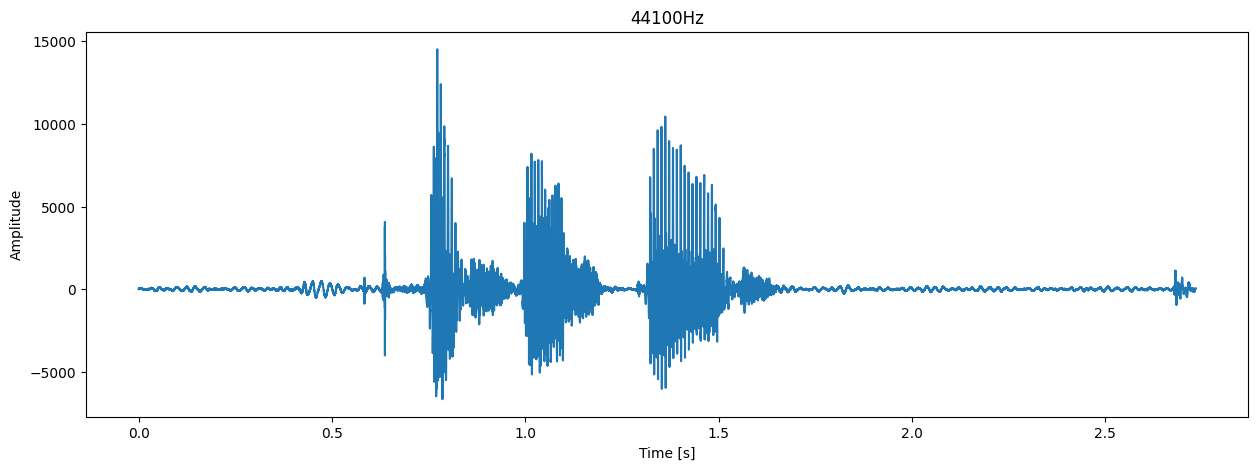

In [5]:
duration = len(audio_data)/sampling_rate

time = np.arange(0,duration,1/sampling_rate) #time vector

draw(sampling=sampling_rate, audio_buffer=audio_data, time=time, title=str(sampling_rate) + "Hz")

ipd.Audio(audio_data, rate=sampling_rate)

#### Sound with 20 000 Гц

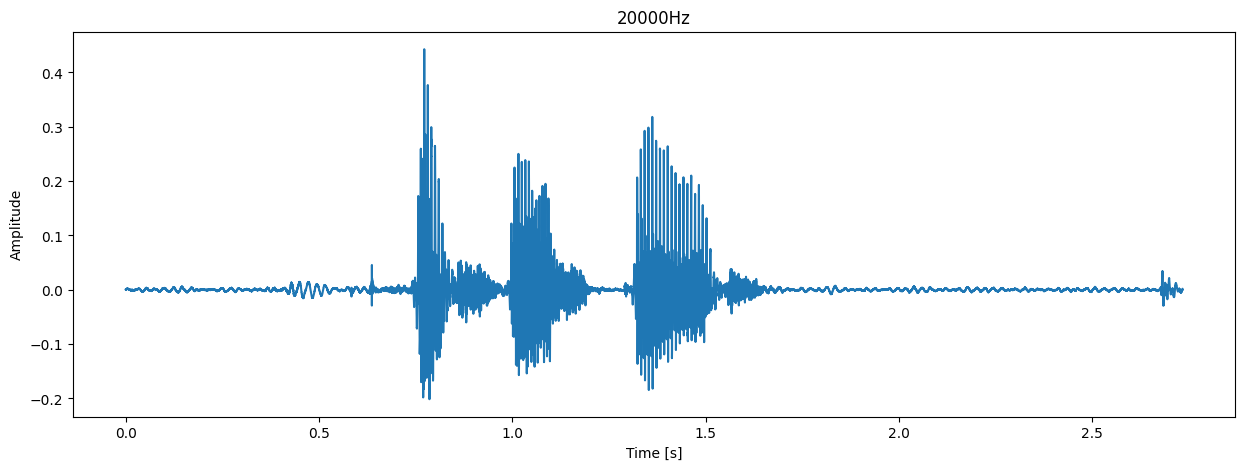

In [6]:
a_d, s = librosa.load(file_name, sr=20000)

duration = len(a_d)/s
time = np.arange(0,duration,1/s) #time vector

draw(sampling=s, audio_buffer=a_d, time=time, title=str(s) + "Hz")

ipd.Audio(a_d, rate=s)

#### Sound with 11 025 Гц

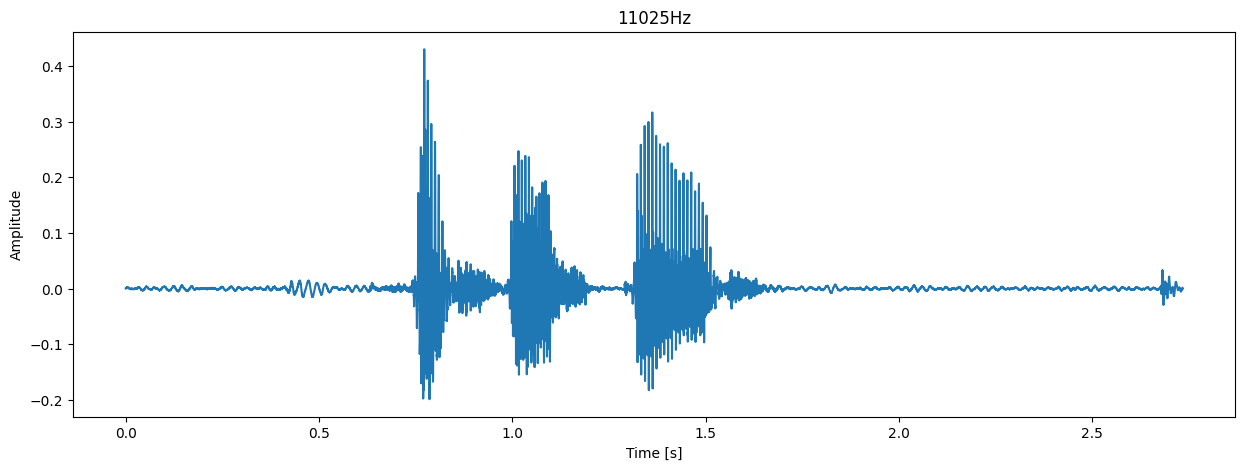

In [7]:
a_d, s = librosa.load(file_name, sr=11025)

duration = len(a_d)/s
time = np.arange(0,duration,1/s) #time vector

draw(sampling=s, audio_buffer=a_d, time=time, title=str(s) + "Hz")

ipd.Audio(a_d, rate=s)

#### Sound with 8000 Гц

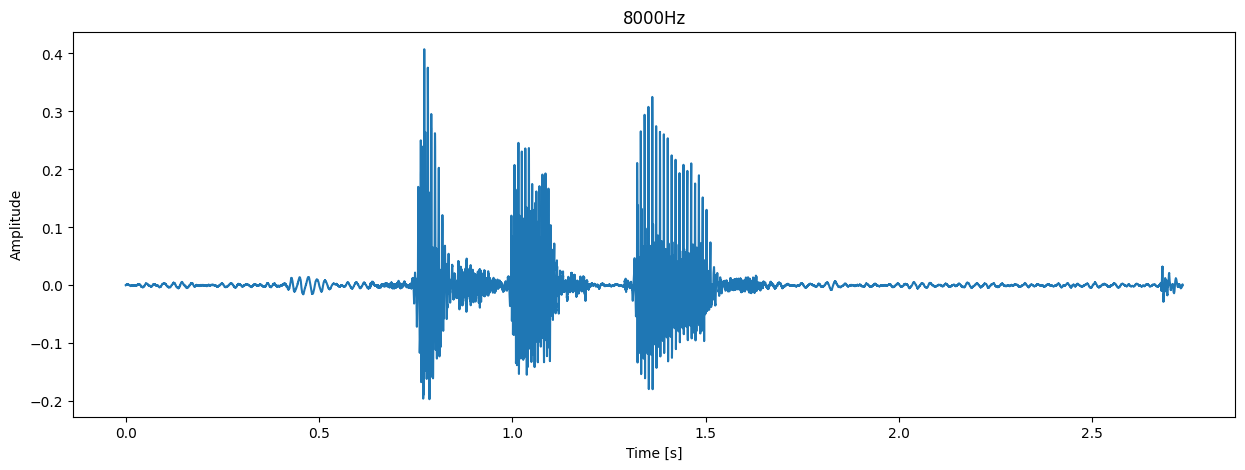

In [8]:
a_d, s = librosa.load(file_name, sr=8000)

duration = len(a_d)/s
time = np.arange(0,duration,1/s) #time vector

draw(sampling=s, audio_buffer=a_d, time=time, title=str(s) + "Hz")

ipd.Audio(a_d, rate=s)

#### Sound with 4000 Гц

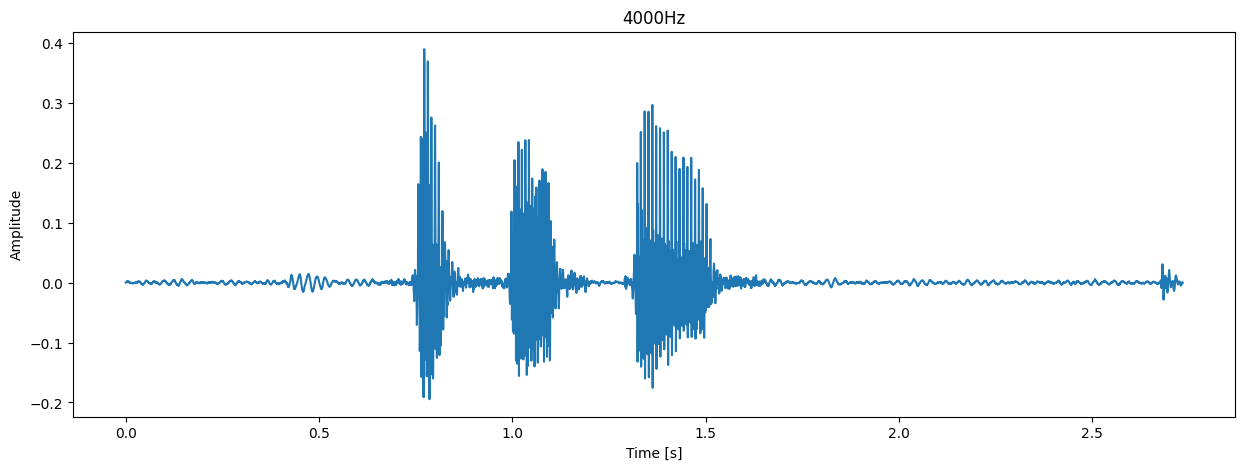

In [9]:
a_d, s = librosa.load(file_name, sr=4000)

duration = len(a_d)/s
time = np.arange(0,duration,1/s) #time vector

draw(sampling=s, audio_buffer=a_d, time=time, title=str(s) + "Hz")


ipd.Audio(a_d, rate=s)

#### Sound with 2000 Гц

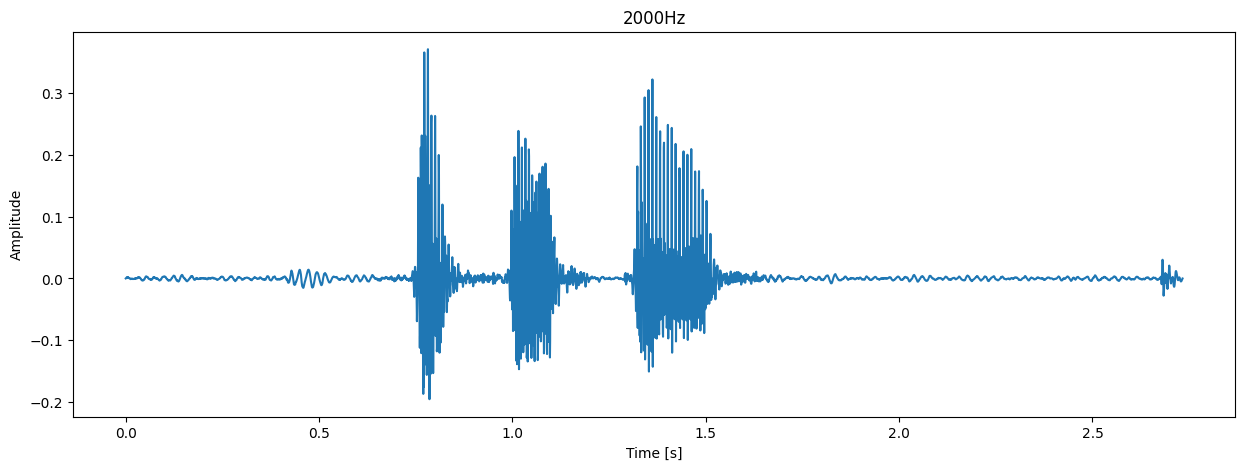

In [10]:
a_d, s = librosa.load(file_name, sr=2000)

duration = len(a_d)/s
time = np.arange(0,duration,1/s) #time vector

draw(sampling=s, audio_buffer=a_d, time=time, title=str(s) + "Hz")

ipd.Audio(a_d, rate=s)

#### Sound with 1000 Гц

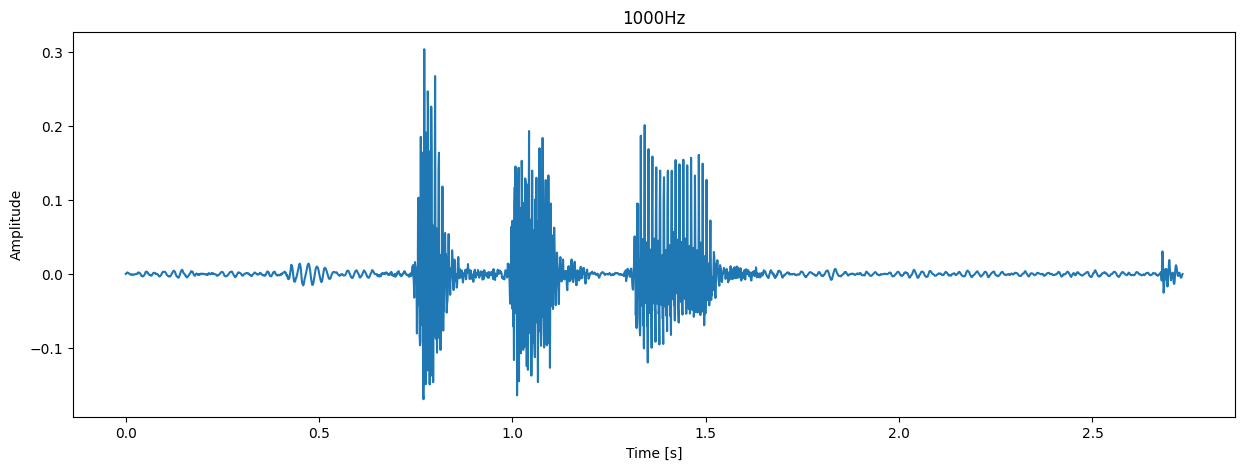

In [11]:
a_d, s = librosa.load(file_name, sr=1000)

duration = len(a_d)/s
time = np.arange(0,duration,1/s) #time vector

draw(sampling=s, audio_buffer=a_d, time=time, title=str(s) + "Hz")

ipd.Audio(a_d, rate=s)

#### Sound with 500 Гц

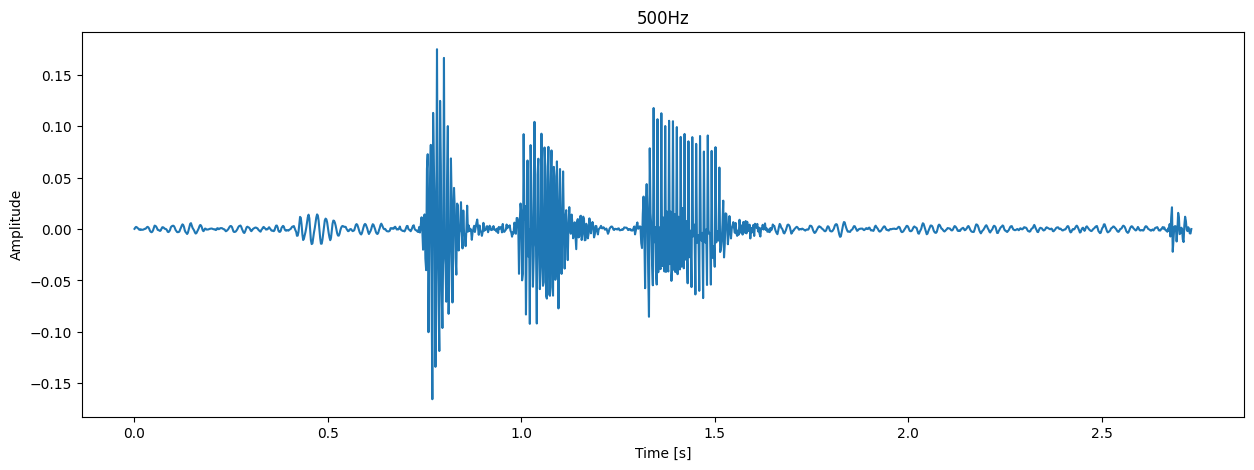

In [12]:
a_d, s = librosa.load(file_name, sr=500)

duration = len(a_d)/s
time = np.arange(0,duration,1/s) #time vector

draw(sampling=s, audio_buffer=a_d, time=time, title=str(s) + "Hz")

ipd.Audio(a_d, rate=s)

#### Summary
В целом в районе диапазона 4кГц еще можно что-то разобрать, но если понижать, то уже становится что-то не разборчивое. Вывод -- хотим хотя бы 4-6rГц для того, чтобы слышать разборчивую речь. При понижении голос становится низким и становится ощущение, что он исходит откуда-то из-под земли или преграды.


### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

#### .mp3

Wav — невероятно детализированная и несжатая версия аудиозаписи, предназначенная для работы на студии.
Битрейт фиксированный — порядка 1400 Кбит/сек
Формирует файлы относительно большого размера


Mp3 — невероятно сжатая и менее детализированная версия аудиозаписи.
Битрейт варьируется между показателями 320 и 8-16 Кбит/сек	
Формирует звуковые файлы сравнительно небольшого размера	

Ogg -- тоже сжатая версия аудиозаписи, в ней может теряться часть данных после применения фильтров и сжатий, однако является более качественной версией чем Mp3 из-за меньшего размера файла и лучшего качества звука


# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [13]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [14]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

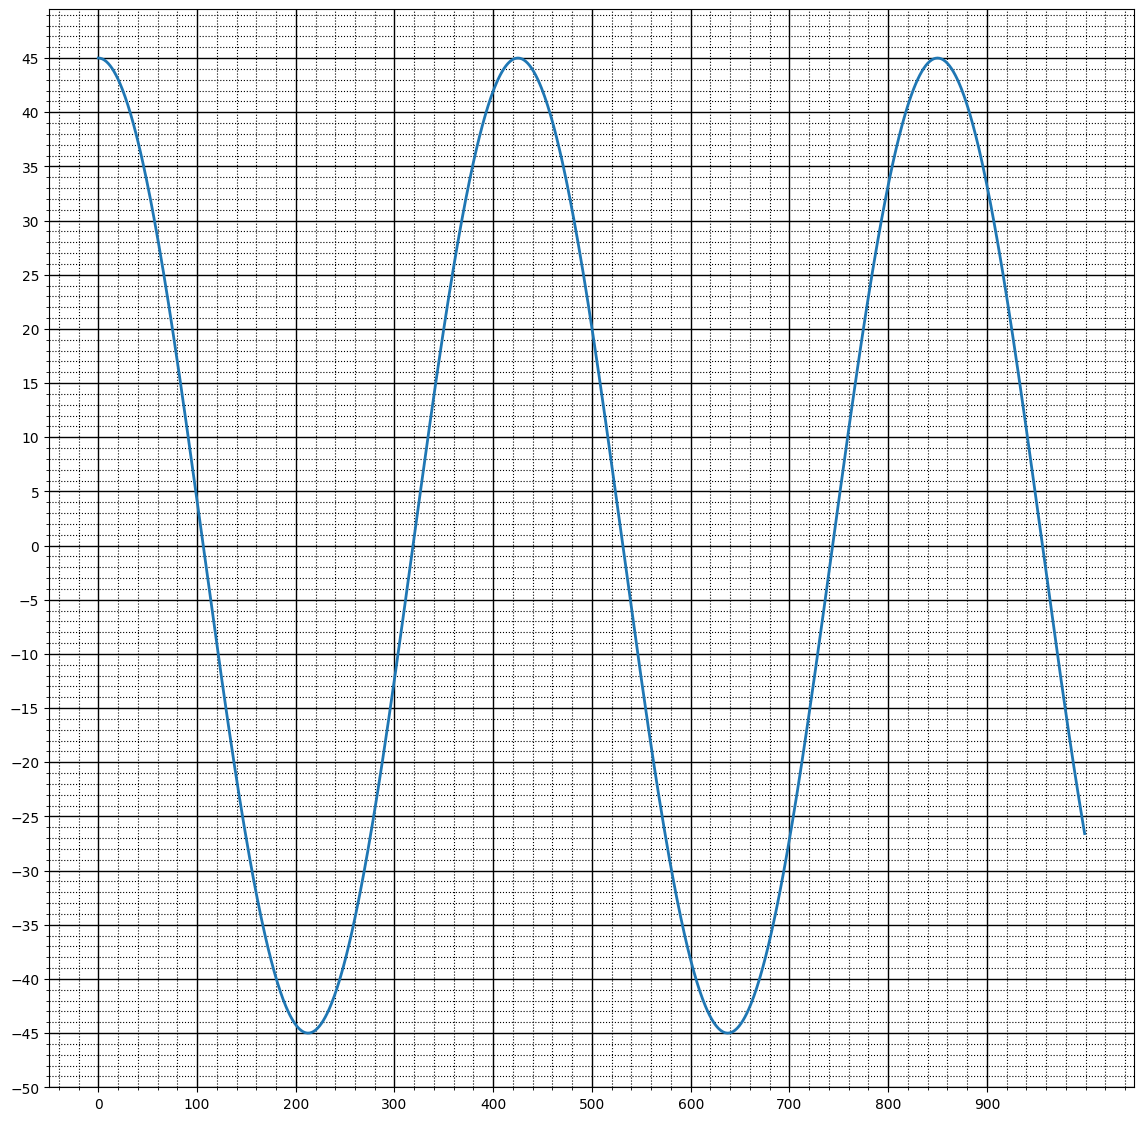

In [15]:
draw_signal(test_data['task2']['a'])

In [16]:
a = 45 * (np.cos(np.arange(0, 1000, 1) * 2 * np.pi / 424.5 ))

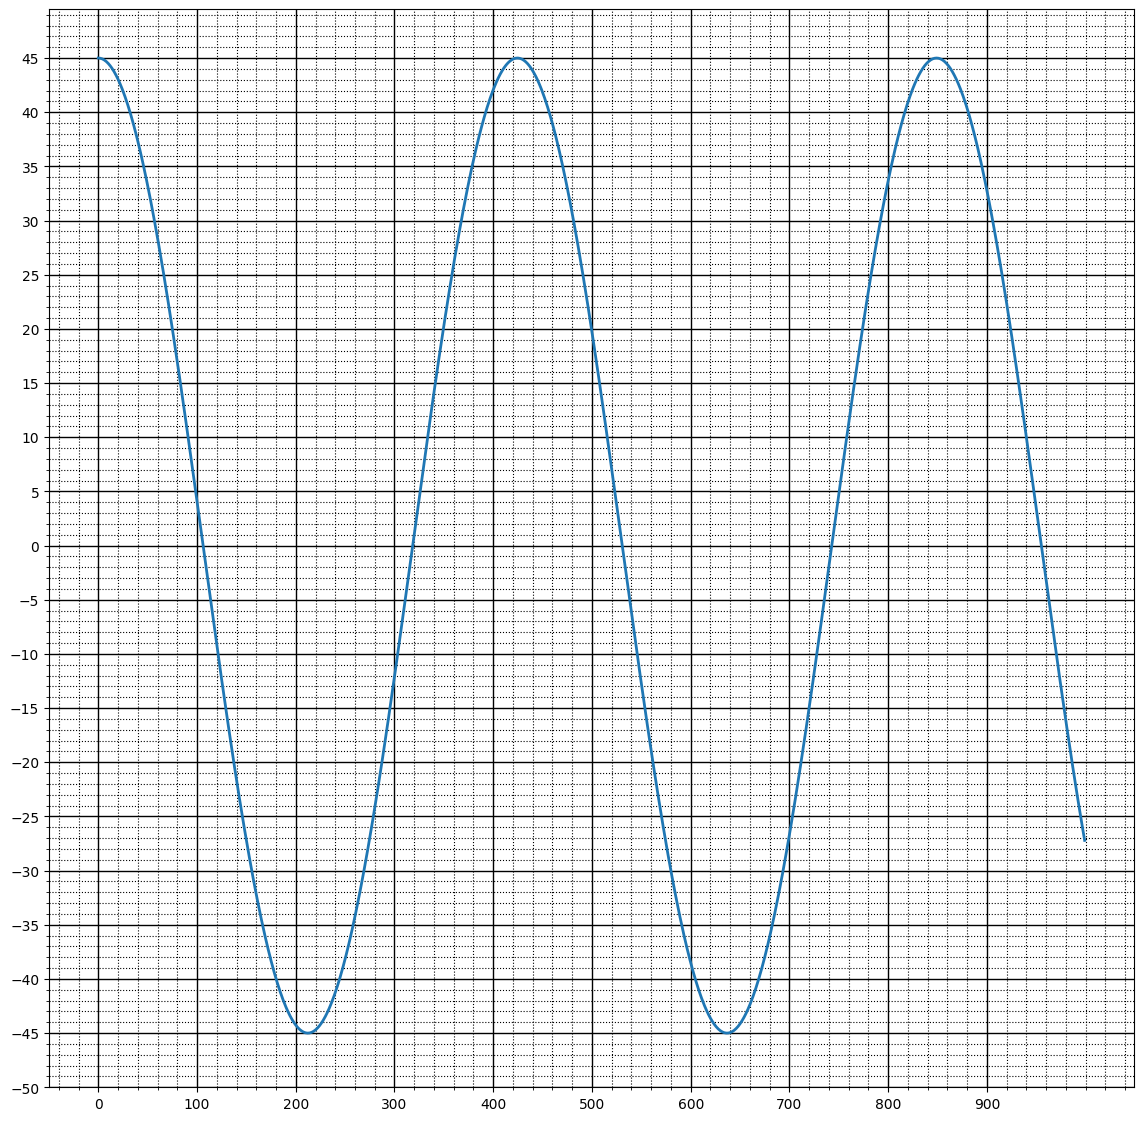

In [17]:
draw_signal(a)

In [18]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{424.5}$

3. Фаза - $\phi= 0$

### Сигнал ***b***

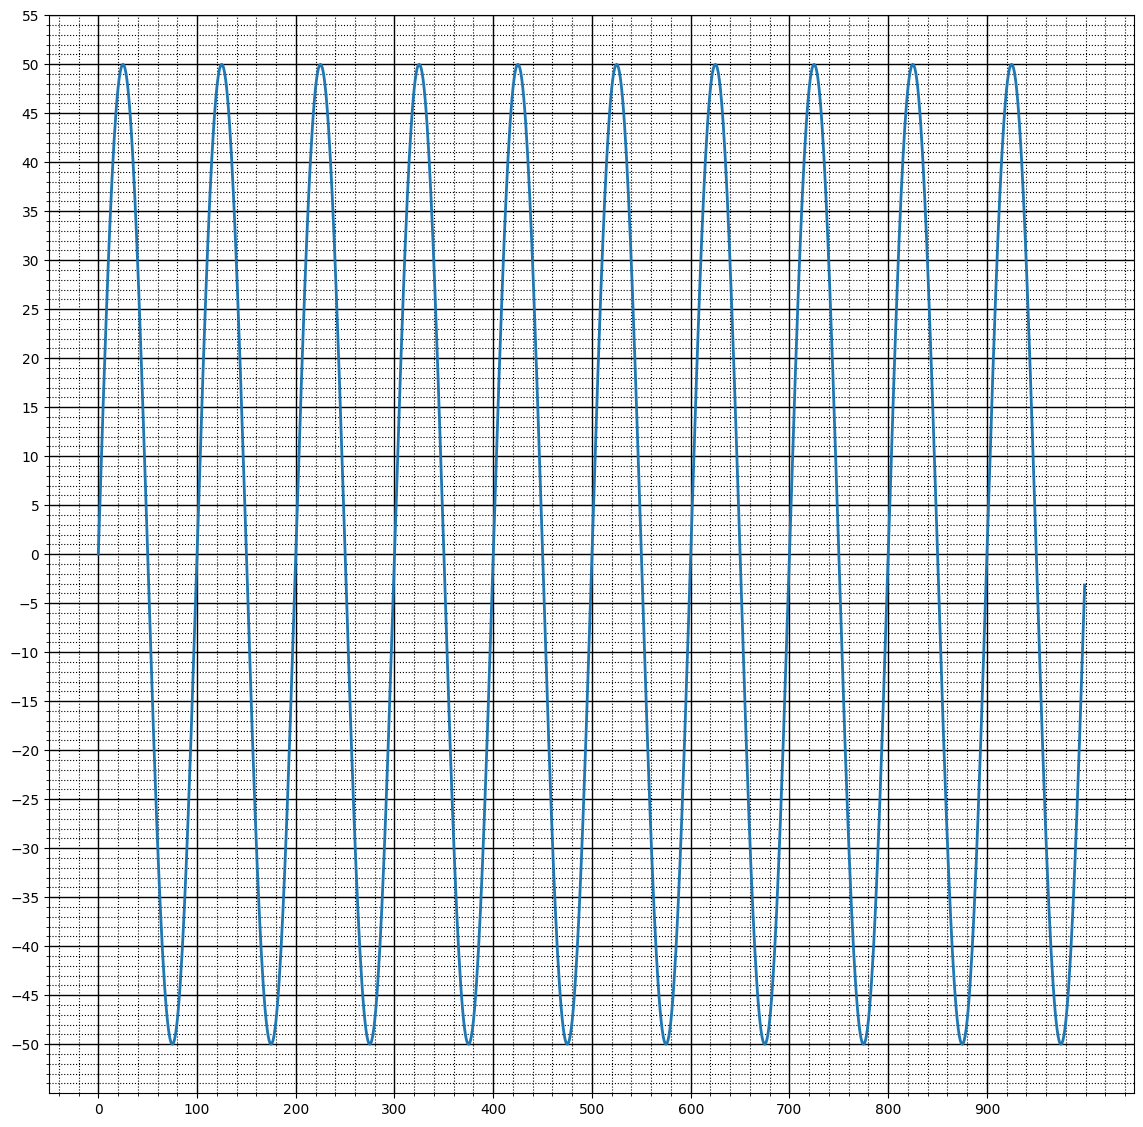

In [19]:
draw_signal(test_data['task2']['b'])

In [20]:
b = 50 * (np.sin(np.arange(0, 1000, 1) * 2 * np.pi / 100 + 0))


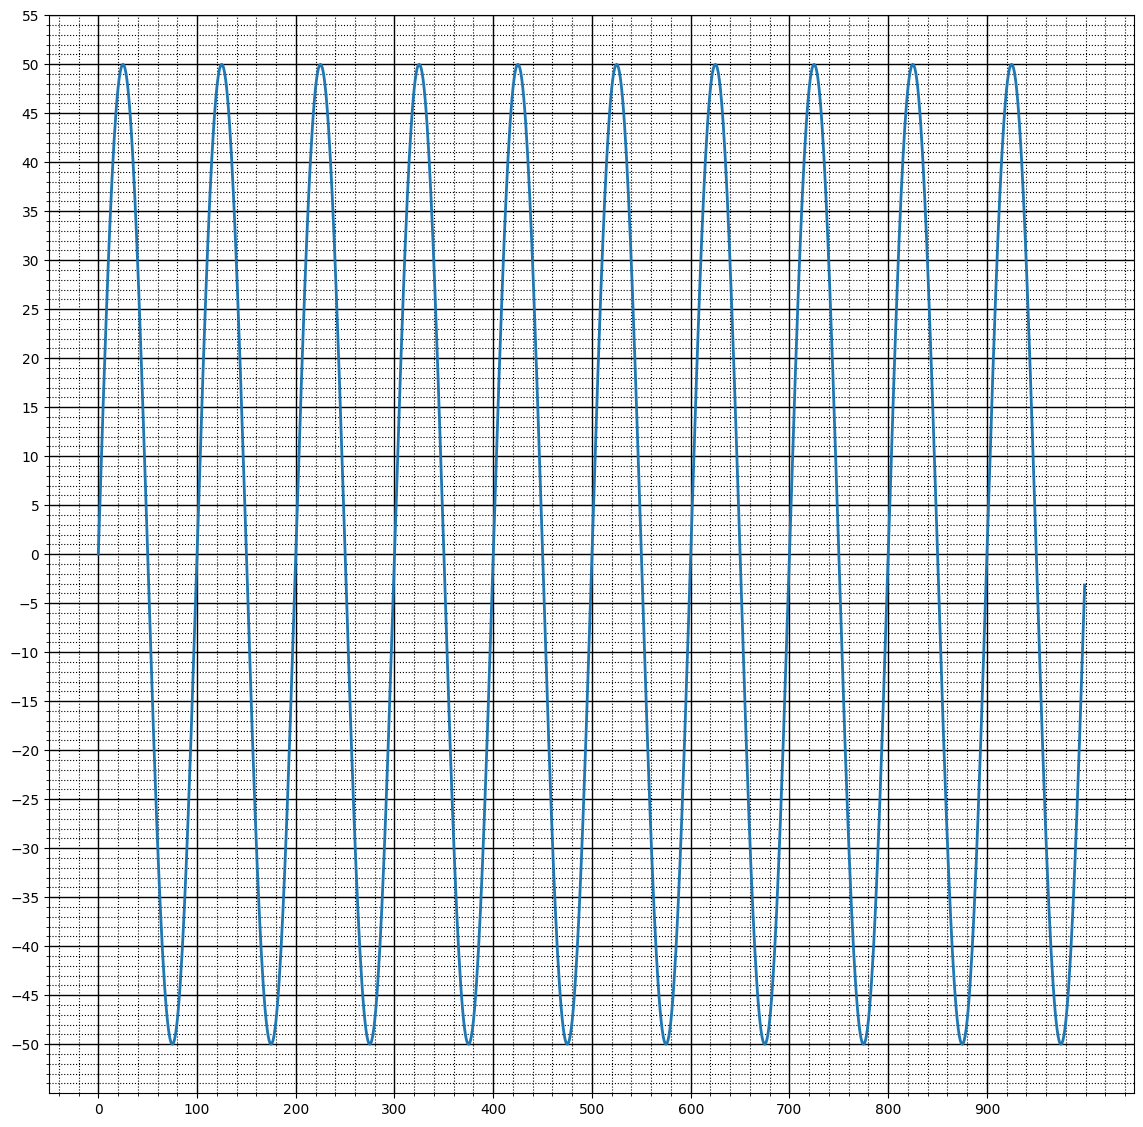

In [21]:
draw_signal(b)

In [22]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2 \pi}{}$

3. Фаза - $\phi= $

### Сигнал ***c***

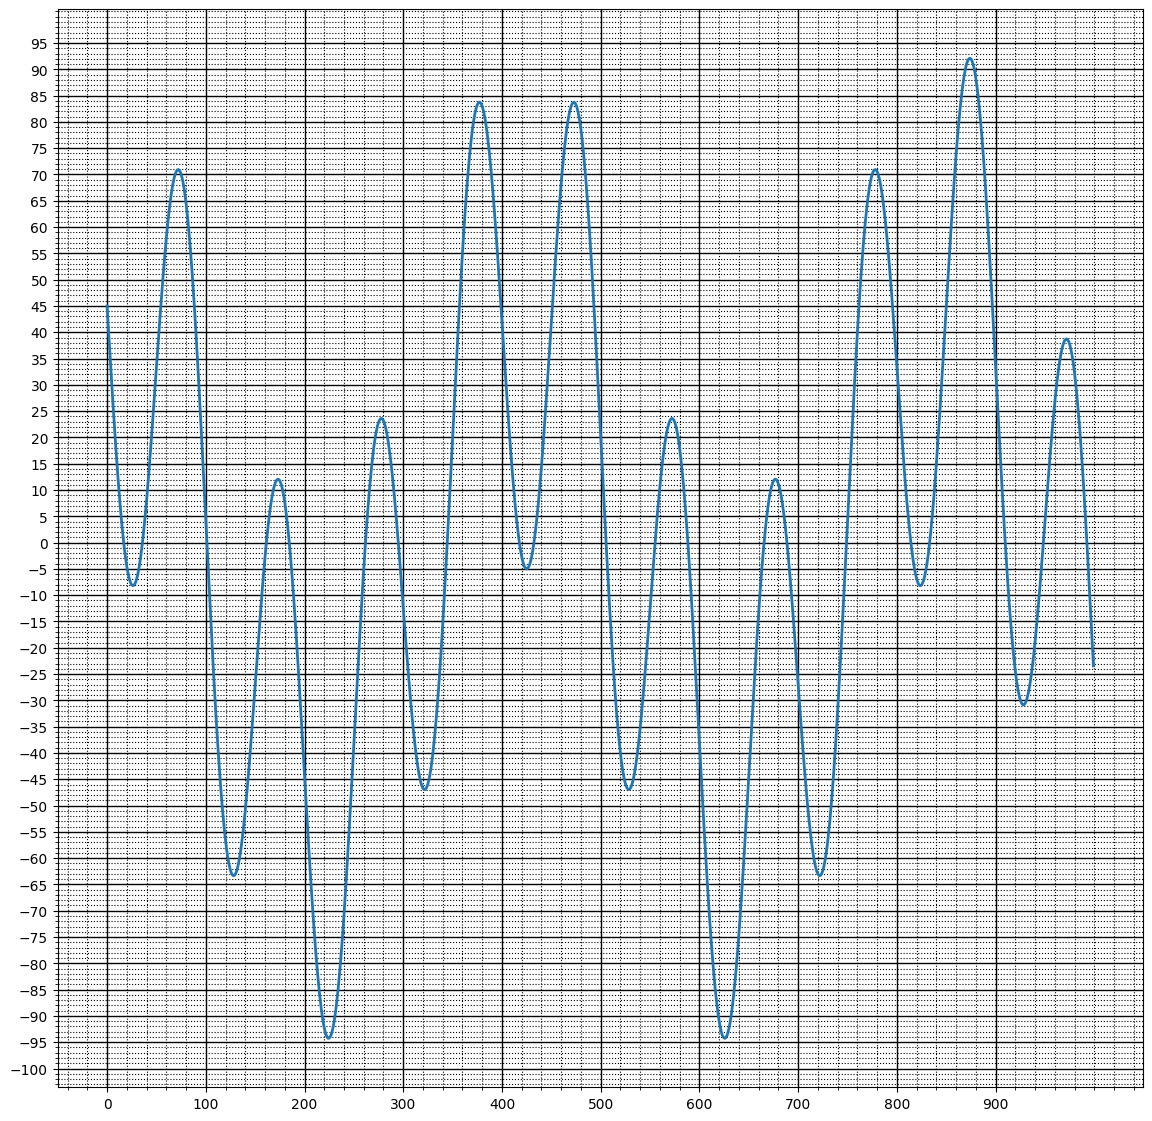

In [23]:
draw_signal(test_data['task2']['c'])

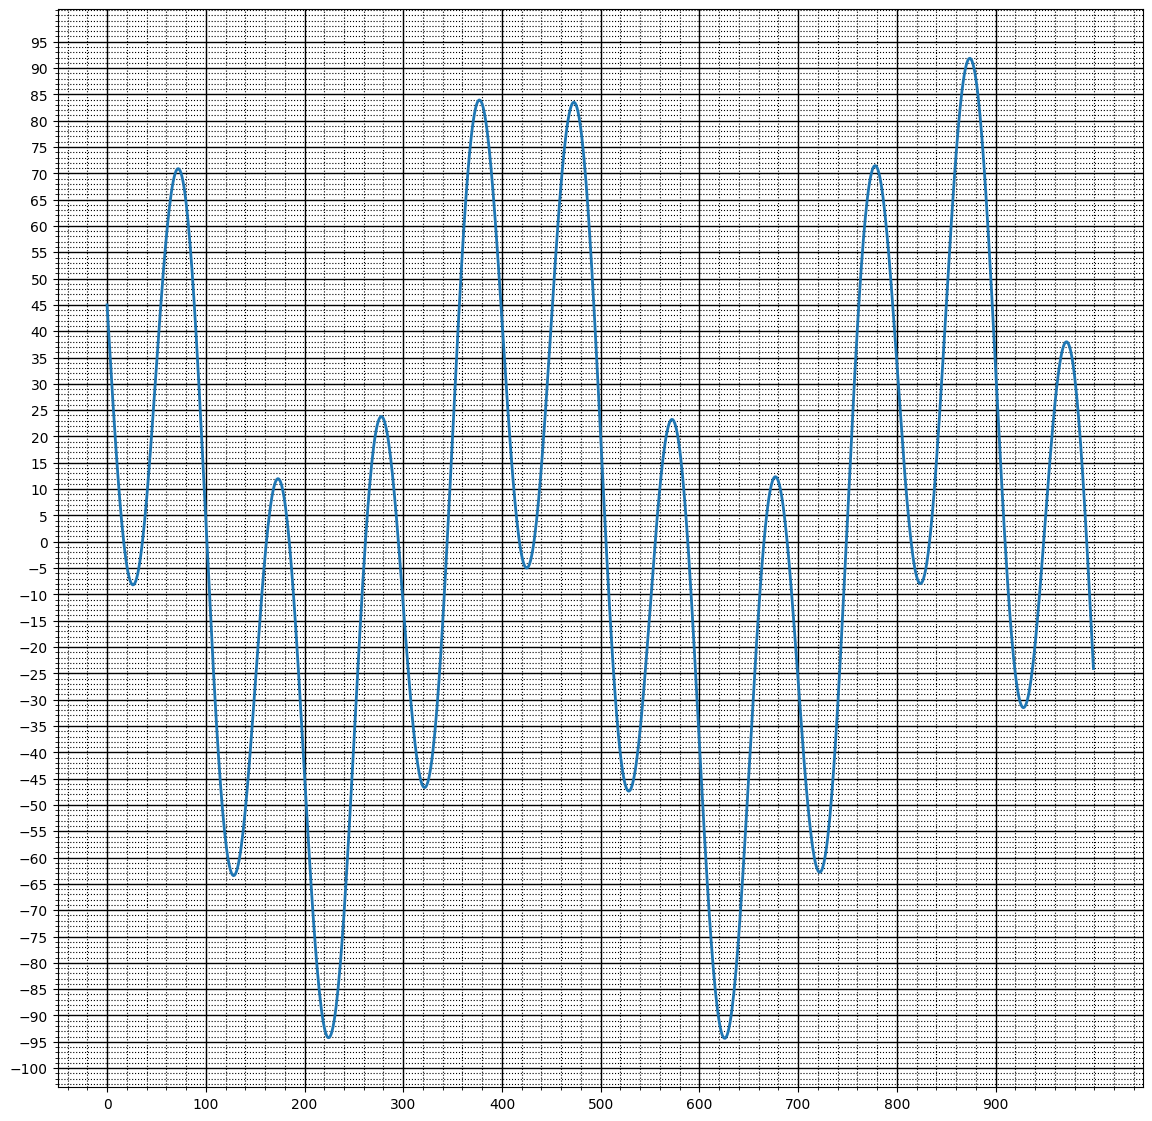

In [24]:
# сигнал состоит из двух гармоник
c = a - b
draw_signal(c)

In [25]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [26]:
import math

def convolve(in1, in2):
    min_a = min(in1, in2, key=len)

    ids = np.arange(0, len(min_a))

    m = max(in1, in2, key=len)
    m = np.append(m, [0] * (len(min_a)-1))
    max_a = np.append([0] * (len(min_a) -1), m)

    ans = []
    
    for i in range(0, len(m)):
        slide = max_a[ids]
        multiplied = [a * b for a, b in zip(min_a, slide)]
        s = np.sum(multiplied)
        ans.append(s)
        ids = ids + 1
        
    return ans
            

In [27]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = sp.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [28]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [29]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

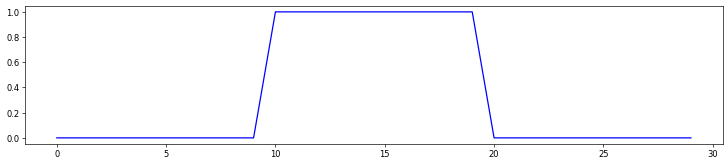

In [30]:
plt.figure(figsize=(15, 3), dpi=60)
plt.plot(a, 'b')
plt.show()


Сигнал **b**

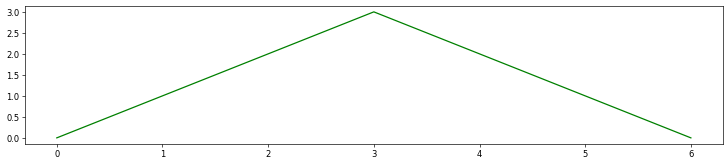

In [31]:
plt.figure(figsize=(15, 3), dpi=60)
plt.plot(b, 'g')
plt.show()

Свертка **a** и **b**

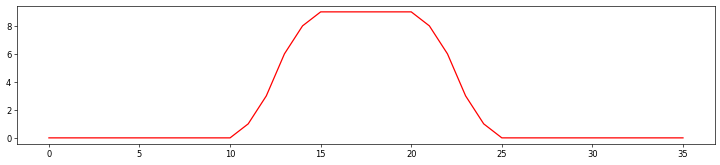

In [32]:
plt.figure(figsize=(15, 3), dpi=60)
plt.plot(convolve(a,b), 'r')
plt.show()

Все 3 графика на одной картинке:

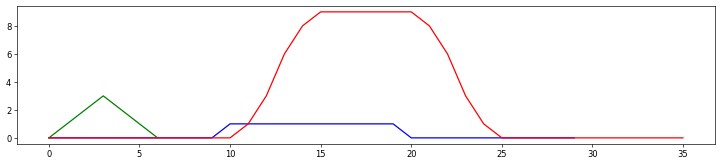

In [33]:
plt.figure(figsize=(15, 3), dpi=60)
plt.plot(a, 'b')
plt.plot(b, 'g')
plt.plot(convolve(a,b), 'r')
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [34]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 

    samples = np.zeros(N)
    
    for i in range(len(noise)):
        samples[i] = noise[i]
 
    for i in range(len(noise), N):
        samples[i] = (samples[i-len(noise)] + samples[i-len(noise)-1]) * 1/2
  
    return samples
   

In [35]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform( -1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [38]:
def audio(gen_wav, frequency):
    guitar_file_name = "resources/lab1/Guitar" + frequency + ".wav"

    with open(guitar_file_name, 'w') as f:
        sp.io.wavfile.write(guitar_file_name, 44100, gen_wav)

    sampling_rate_rate, audio_data = sp.io.wavfile.read(guitar_file_name, "r")
    return audio_data, sampling_rate


gen_wav = karplus_strong(noise, gen_len)
x, y = audio(gen_wav, str(frequency))
ipd.Audio(x, rate=y)
# ipd.Audio(audio_data, rate=sampling_rate)

Визуализируем затухание амплитуды:

In [ ]:
def draw(gen_len, aml):
    plt.figure(figsize=(10,5))
    plt.xlabel('n', fontsize=14)
    plt.ylabel('Амплитуда', fontsize=14)
    plt.xlim(0, gen_len)
    plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.title(aml)
    plt.grid()

draw(gen_len, str(frequency))

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# A
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 110
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform( -1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
draw(gen_len, str(frequency))

x, y = audio(gen_wav, str(frequency))
ipd.Audio(x, rate=y)


In [ ]:
# D
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 146.83
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform( -1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
draw(gen_len, str(frequency))

x, y = audio(gen_wav, str(frequency))
ipd.Audio(x, rate=y)



In [ ]:
# G
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 196
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform( -1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
draw(gen_len, str(frequency))

x, y = audio(gen_wav, str(frequency))
ipd.Audio(x, rate=y)



In [ ]:

# B
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 329.63
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform( -1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
draw(gen_len, str(frequency))
x, y = audio(gen_wav, str(frequency))
ipd.Audio(x, rate=y)



In [ ]:
# E
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 246.94
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform( -1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
draw(gen_len, str(frequency))

x, y = audio(gen_wav, str(frequency))
ipd.Audio(x, rate=y)